In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
cols = data.feature_names

In [6]:
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = data.data

In [8]:
df = pd.DataFrame(df,columns=cols)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
target = data.target

In [11]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df['target'] = target

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
from torch.utils.data import TensorDataset , DataLoader 

In [15]:
data = df.drop('target',axis = 1).values
labels = df.target.values

In [16]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [18]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [19]:
len(iris)

150

In [20]:
for i,j in iris:
    print(i,j)

tensor([5.1000, 3.5000, 1.4000, 0.2000]) tensor(0)
tensor([4.9000, 3.0000, 1.4000, 0.2000]) tensor(0)
tensor([4.7000, 3.2000, 1.3000, 0.2000]) tensor(0)
tensor([4.6000, 3.1000, 1.5000, 0.2000]) tensor(0)
tensor([5.0000, 3.6000, 1.4000, 0.2000]) tensor(0)
tensor([5.4000, 3.9000, 1.7000, 0.4000]) tensor(0)
tensor([4.6000, 3.4000, 1.4000, 0.3000]) tensor(0)
tensor([5.0000, 3.4000, 1.5000, 0.2000]) tensor(0)
tensor([4.4000, 2.9000, 1.4000, 0.2000]) tensor(0)
tensor([4.9000, 3.1000, 1.5000, 0.1000]) tensor(0)
tensor([5.4000, 3.7000, 1.5000, 0.2000]) tensor(0)
tensor([4.8000, 3.4000, 1.6000, 0.2000]) tensor(0)
tensor([4.8000, 3.0000, 1.4000, 0.1000]) tensor(0)
tensor([4.3000, 3.0000, 1.1000, 0.1000]) tensor(0)
tensor([5.8000, 4.0000, 1.2000, 0.2000]) tensor(0)
tensor([5.7000, 4.4000, 1.5000, 0.4000]) tensor(0)
tensor([5.4000, 3.9000, 1.3000, 0.4000]) tensor(0)
tensor([5.1000, 3.5000, 1.4000, 0.3000]) tensor(0)
tensor([5.7000, 3.8000, 1.7000, 0.3000]) tensor(0)
tensor([5.1000, 3.8000, 1.5000,

In [21]:
iris_loader = DataLoader(iris,batch_size = 50,shuffle = True
                        )

In [22]:
for batch in iris_loader:
    print(batch)

[tensor([[5.5000, 2.5000, 4.0000, 1.3000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.8000, 3.4000, 1.6000, 

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [24]:
class Model(nn.Module):
    def __init__(self,in_features = 4 , h1= 8 , h2 = 9, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [25]:
torch.manual_seed(32)
model = Model()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
X = df.drop("target",axis = 1).values
y = df['target'].values

In [29]:
# X = X.values
# y = y.values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [31]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [32]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [33]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters() , lr = 0.01)

In [34]:
#   EPOCHS?

In [35]:
losses = []
epochs = 100

for i in range(epochs):
    y_pred = model.forward(X_train)
    
    # CALC ERROr
    
    loss = criterion(y_pred,y_train)
    
    losses.append(loss)
    
    if i%10==0:
        print(f"Epochs : {i}, loss : {loss}")
    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs : 0, loss : 1.150745153427124
Epochs : 10, loss : 0.9371446371078491
Epochs : 20, loss : 0.779624342918396
Epochs : 30, loss : 0.6078531742095947
Epochs : 40, loss : 0.3989454209804535
Epochs : 50, loss : 0.2524920403957367
Epochs : 60, loss : 0.1492769420146942
Epochs : 70, loss : 0.10029561072587967
Epochs : 80, loss : 0.0810069665312767
Epochs : 90, loss : 0.07216038554906845


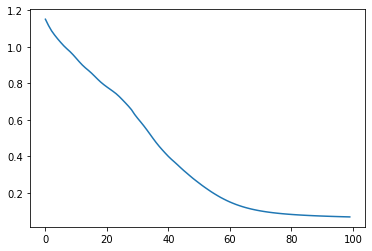

In [36]:
plt.plot(range(epochs),losses)